# SEEPS4ALL noteboook 3
## Verification of dressed forecasts using climate percentiles
(requires to run notebook_get_forecast_single.ipynb first if you want to assess your own set of forecasts)

Assessing dressed forecasts against observations using a local climatology for score computation. 

In [1]:
import datetime
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
from utils.utils_data  import get_obs
from utils.utils_data  import get_fct

from utils.utils_data  import get_domain
from utils.utils_stats import get_weights
from utils.utils_stats import dressing

from utils.utils_scores import get_scores_thr
from utils.utils_scores import get_score
from utils.utils_plots  import plot_scores
from utils.utils_plots  import plot_simple_scores

### 1. Settings

In [3]:
# where the data sit or will sit
path_data     = "/my/data/folder/seeps4all/"

# forecasts
name_forecasts = ["ifs_20240601_to_20240831_00",
                  "aifsv1_20240601_to_20240831_00"]
delta_x = [25,25]

# colours and names 
colors = ["tab:red","tab:blue"]
labels = ["IFS", "AIFS single v1"]

# ouput path and prefix
prefig = "./prefix"


### 2. Read observations (+ metadata, + climate) and forecasts

In [4]:
# open data
obs_data = get_obs(path_data,"clim")
fct_data = get_fct(path_data,name_forecasts)

open: /ec/res4/scratch/mozb/rodeo/seeps4all//obs_clim_tp24_2022_2024_ecad.zarr
... total number of observation locations: 10705
open: /ec/res4/scratch/mozb/rodeo/seeps4all//ifs_20240601_to_20240831_00.zarr
Number of forecast steps: 10
Number of forecast runs: 92
open: /ec/res4/scratch/mozb/rodeo/seeps4all//aifsv1_20240601_to_20240831_00.zarr
Number of forecast steps: 10
Number of forecast runs: 92


### 3. Domain and station weighting 

In [5]:
# verification domain
domain = "europe" # default otherwise define
obs_data,fct_data = get_domain(obs_data,fct_data,domain)

focus on domain europe


In [6]:
# weighting: "uniform" or "station_weighting"
weights = get_weights(obs_data,"station_weighting")

weights based on station density


### 4. Dress the forecast
(to derive a pseudo-ensemble)

In [7]:
# generalised model 
fct_data = dressing(fct_data,delta_x,nmem=10)

In [8]:
#Check one output 
if False:
    fig = plt.figure(figsize=(4,3.5))
    plt.plot(fct[0,0,:],fct_dressed[0,0,0,:],".k")
    plt.xlabel("forecast")
    plt.ylabel("dressed forecast")
  

Compute brier score for a given threshold (key) over verification period for each forecast lead time

In [9]:
# percentiles of the local climatology used as thresholds
thresholds = ("perc65","perc70","perc75","perc80","perc85","perc90","perc95","perc98","perc99") 

bs,eds = get_scores_thr(obs_data,fct_data, weights,thresholds)

experiment 0, 10 steps
step: 0 1 2 3 4 5 6 7 8 9 
experiment 1, 10 steps
step: 0 1 2 3 4 5 6 7 8 9 


In [10]:
# info for plotting
plot_info= dict()
plot_info["prefig"]     = prefig
plot_info["colors"]     = colors
plot_info["labels"]     = labels
plot_info["thresholds"] = thresholds

Plotting Brier score

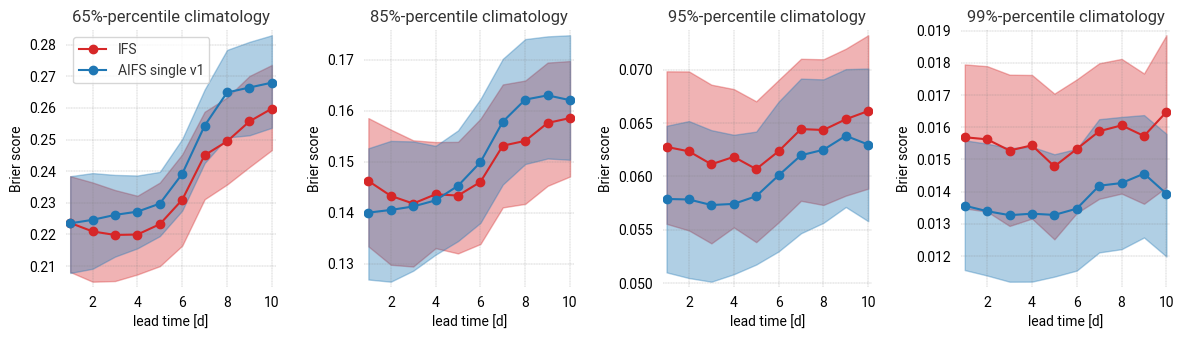

In [11]:
plot_scores(bs,"Brier score",plot_info,along="steps",x_list=[0,4,6,8])

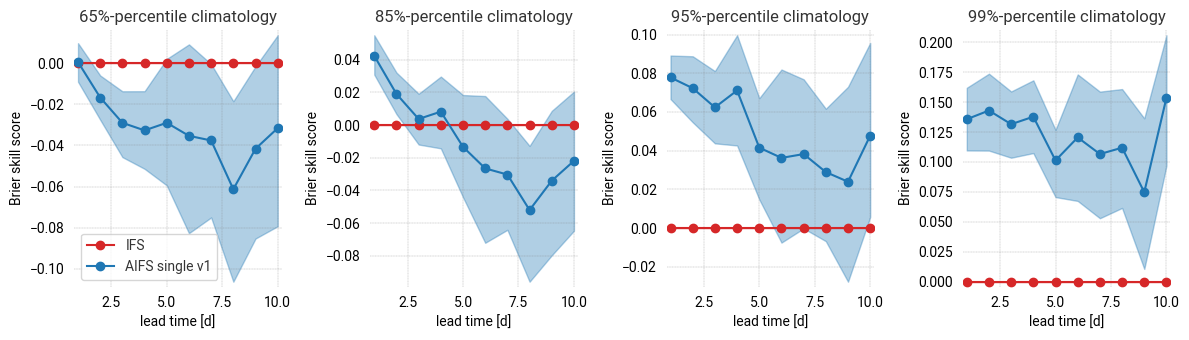

In [12]:
plot_scores(bs,"Brier skill score",plot_info,along="steps",x_list=[0,4,6,8])

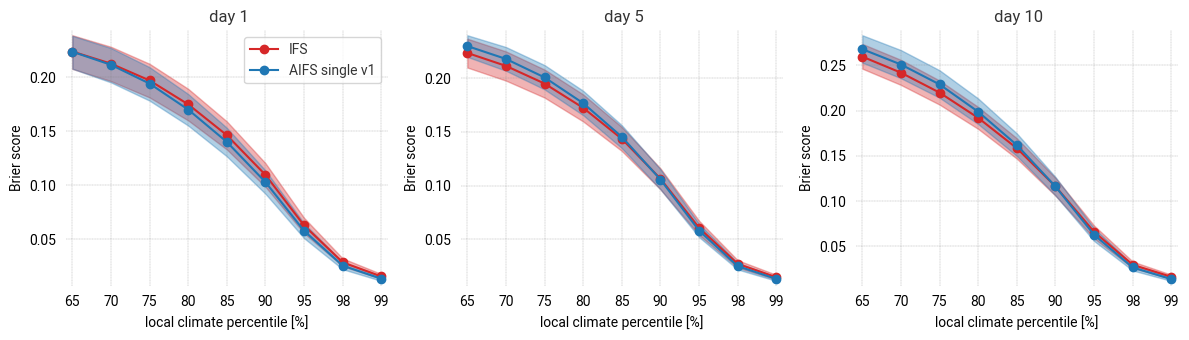

In [13]:
plot_scores(bs,"Brier score",plot_info,along="thresholds",x_list=[0,4,9])

Plotting elementary diagonal score

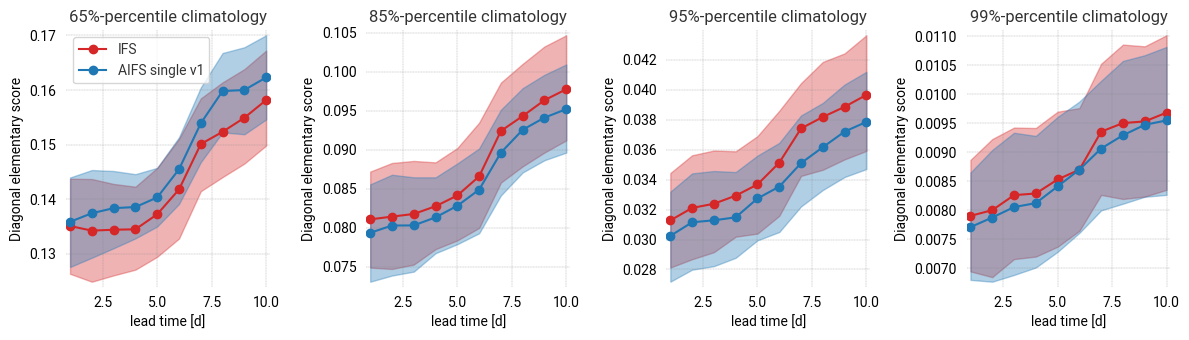

In [14]:
plot_scores(eds,"Diagonal elementary score",plot_info,along="steps",x_list=[0,4,6,8])

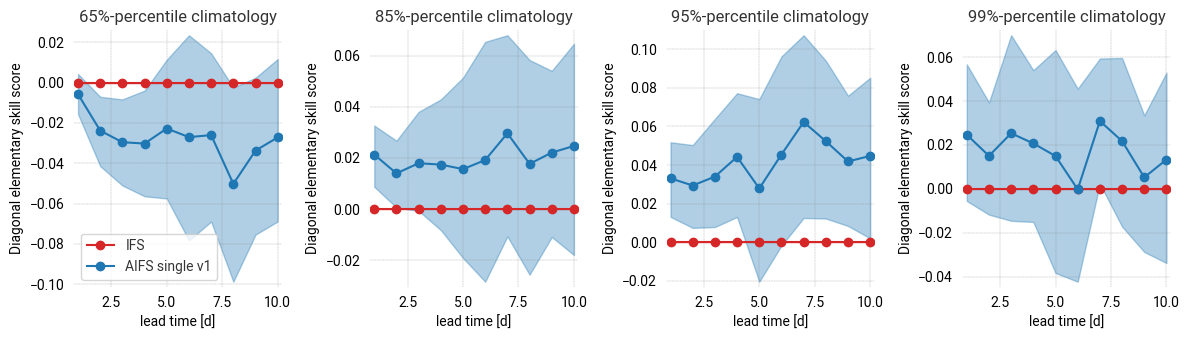

In [15]:
plot_scores(eds,"Diagonal elementary skill score",plot_info,along="steps",x_list=[0,4,6,8])

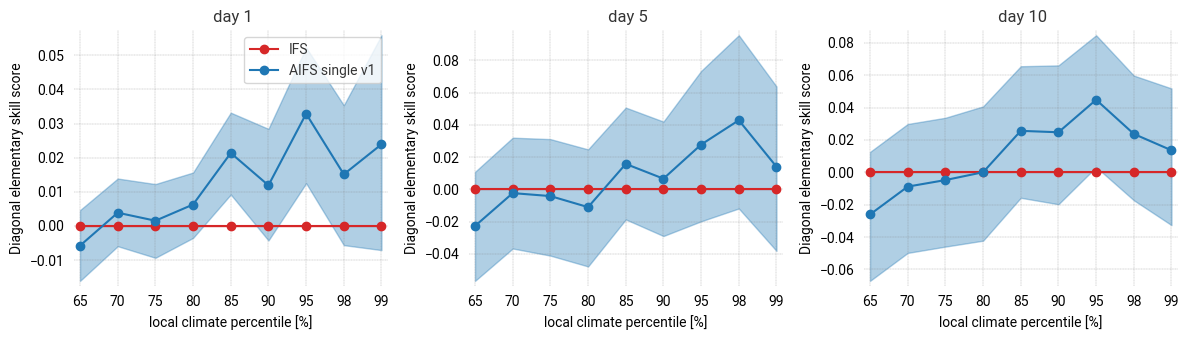

In [16]:
plot_scores(eds,"Diagonal elementary skill score",plot_info,along="thresholds",x_list=[0,4,9])

### 5. Compute and plot DIAGS

In [17]:
diags = get_score(obs_data,fct_data,weights,"diags")

experiment 0, 10 steps
step: 0 1 2 3 4 5 6 7 8 9 
experiment 1, 10 steps
step: 0 1 2 3 4 5 6 7 8 9 


plots 

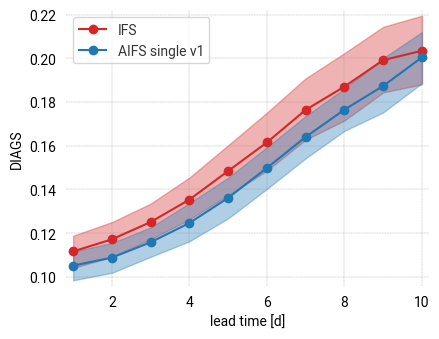

In [18]:
plot_simple_scores(diags,"DIAGS",plot_info)

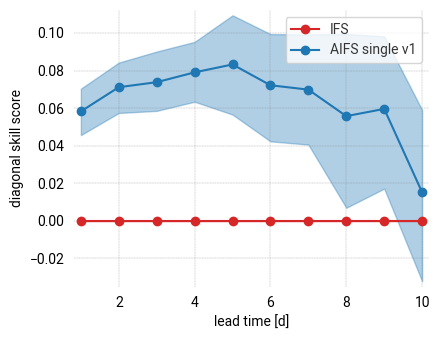

In [19]:
plot_simple_scores(diags,"diagonal skill score",plot_info)

End of the Notebook